1. [Security Token Service](#security-token-service)
2. [STS Assume Role](#sts-assume-role)
3. [Hands On - STS Assume Role - Method I](#hands-on---sts-assume-role---method-i)
4. [Hands On - STS Assume Role - Method II](#hands-on---sts-assume-role---method-ii)
5. [Cross Account access - STS](#cross-account-access---sts)
6. [IAM Roles/User with MFA enabled](#iam-rolesuser-with-mfa-enabled)
7. [IAM Authorization Model](#iam-authorization-model)
8. [IAM Policy & Bucket Policy](#iam-policy--bucket-policy)
9. [Dynamic Policies with IAM](#dynamic-policies-with-iam)
10. [AWS Managed Policy vs Customer Managed Policy vs Inline Policy](#aws-managed-policy-vs-customer-managed-policy-vs-inline-policy)
11. [iam:PassRole & iam:GetRole](#iampassrole--iamgetrole)
12. [Can any role be passed to an AWS Service?](#can-any-role-be-passed-to-an-aws-service?)

## Security Token Service:
- grants access to AWS resources up to 1 hour
- Important APIs:
    - AssumeRole
    - AssumeRoleWithSAML
    - AssumeRoleWithWebIdentity (now replaced by Cognito Identity Pools)
    - GetSessionToken (for MFA users)
    - GetFederationToken
    - GetCallerIdentity (return details about the IAM user or role used)
    - DecodeAuthorizationMethod (decode error message when AWS API is denied)


### STS Assume Role:
- Define IAM role within account or cross account
- Define which principal's can access this Role
- Use AWS STS to retrieve credentials and impersonate the IAM role for which we have access to
- The credentials can be valid between 15 minutes to 1 hour

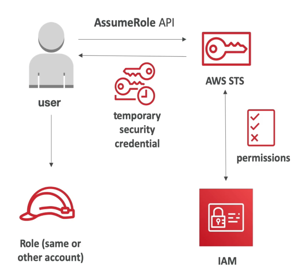

In [50]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/assume.jpeg')
new_image = img.resize((300, 280))
display(new_image)

#### Hands On - STS Assume Role - Method I:
- Go to IAM console
    - Create a Role with policy document attached (S3 Full access)
    - Create a User
        - After creating the User
    - Go into created IAM Role 
        - Go to Trust relationship tab
            - Edit Trust Policy
            

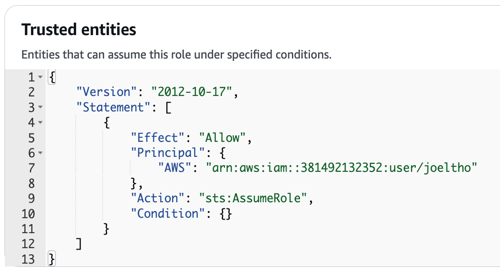

In [51]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/trust.jpeg')
new_image = img.resize((500, 280))
display(new_image)

#### Hands On - STS Assume Role - Method II:
- Go to IAM console
    - Create a Role with policy document attached (S3 Full access)
    - Create a User
    - After creating the User
        - Go into the created IAM user
            - Add permissions
                - Add inline policy
                    - Use sts:AssumeRole
                    - Refer the below image for the template

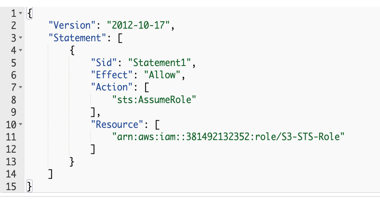

In [52]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/sts.jpeg')
new_image = img.resize((380, 200))
display(new_image)

Note: 
- Even after attaching the IAM Roles to User with sts:AssumeRole, it still shows credential error
- Go to IAM Role created for sharing, copy the Link to switch roles in console URL


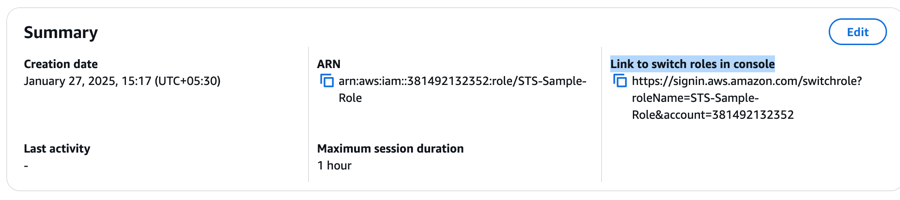

In [53]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/url.jpeg')
new_image = img.resize((900, 200))
display(new_image)

- Open the copied link in the browser and now the IAM user which consumed the IAM Role will work successfully 

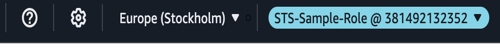

In [54]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/color.jpeg')
new_image = img.resize((500, 50))
display(new_image)

#### Cross Account access - STS:

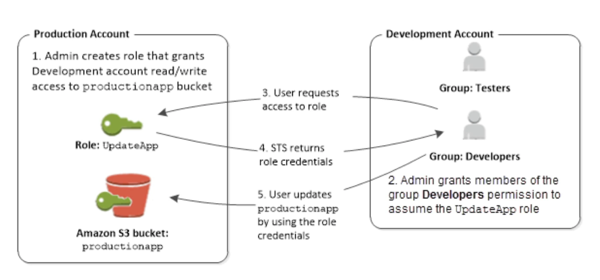

In [55]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cross.jpeg')
new_image = img.resize((600, 280))
display(new_image)

#### IAM Roles/User with MFA enabled:
Python (Botocore)
- https://github.com/awsdocs/aws-doc-sdk-examples/blob/main/python/example_code/sts/assume_role_mfa.py

STS: 
- https://docs.aws.amazon.com/STS/latest/APIReference/API_AssumeRole.html

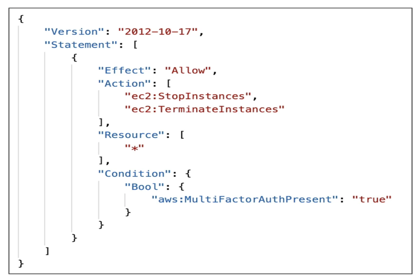

In [56]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/mfa.jpeg')
new_image = img.resize((420, 280))
display(new_image)

#### IAM Authorization Model:

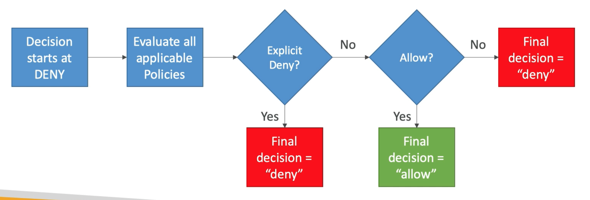

In [57]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/model.jpeg')
new_image = img.resize((590, 200))
display(new_image)

#### IAM Policy & Bucket Policy:
- Evaluation is union of both the policies

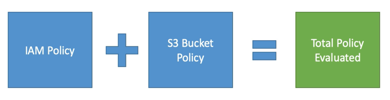

In [58]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/union.jpeg')
new_image = img.resize((390, 100))
display(new_image)

Example 1: 
- IAM Role has Read/Write policies attached to it but has no bucket policy
- Soln: can read/write to the bucket

Example 2: 
- IAM Role has Read/Write policies attached to it but has bucket policy with explicit "DENY"
- Soln: cannot read/write to the bucket since DENY has more priority over explicit allows

Example 3:
- IAM Role has no policies attached to it but has bucket policy with explicit "ALLOW" to Read/Write
- Soln: can read/write to the bucket

Example 4:
- IAM Role has explicit deny policies attached to it but has bucket policy with explicit "ALLOW" to Read/Write
- Soln: cannot read/write to the bucket since DENY has more priority over explicit allows


#### Dynamic Policies with IAM:
- How do we assign each user a home/<"user"> folder in an s3 bucket?

Option 1:
- Create separate IAM policy for each user

Option 2:
- Use ${aws:username} in the policy document

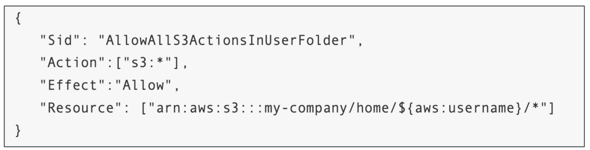

In [59]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/dynamic.jpeg')
new_image = img.resize((590, 150))
display(new_image)

#### AWS Managed Policy vs Customer Managed Policy vs Inline Policy:

AWS Managed Policy:
- It is Managed by AWS

Customer Managed Policy:
- Created by customer (us)
- applied ot many principals
- Version control, rollback, central change management

Inline (inside IAM users only):
- Created by us 
- one-to-one relationship between policy and principal
- If IAM principal deleted policy is also deleted

#### iam:PassRole & iam:GetRole:

iam:PassRole:
- granting an user to pass IAM role to an AWS service

Note:
- Below IAM User role,
    - user can perform any action on EC2 (ec2:*)
    - besides, the iam:PassRole attached for S3 access (IAM role) will be attached to the EC2 instances

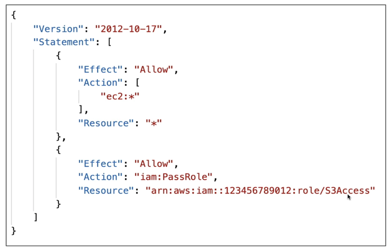

In [60]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/passrole.jpeg')
new_image = img.resize((390, 250))
display(new_image)

##### Can any role be passed to an AWS Service?
- NO, its based on the trust relationship policy

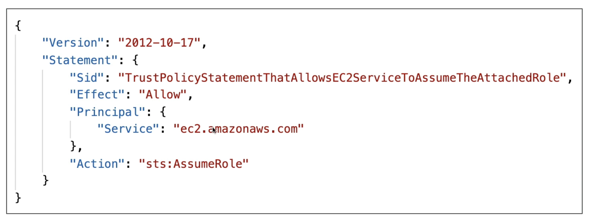

In [61]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/trust_policy.jpeg')
new_image = img.resize((590, 220))
display(new_image)

iam:GetRole:
- To get Role information
- https://docs.aws.amazon.com/IAM/latest/UserGuide/id_roles_use_passrole.html

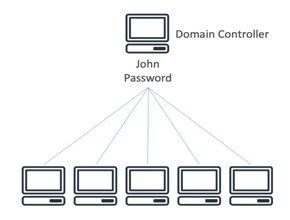

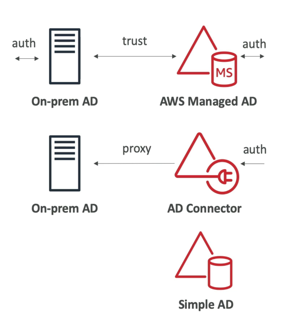